In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import dynadojo.dynadojo as dd
import numpy as np

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

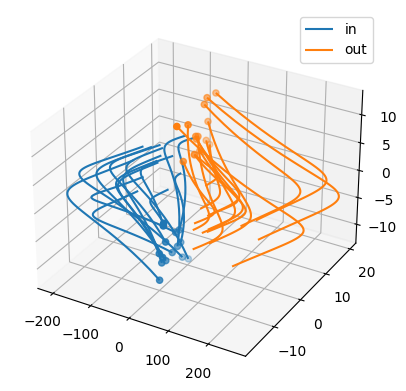

In [29]:
latent_dim = 5
embed_dim = 10
n = 5000
timesteps = 50
system = dd.systems.LDSSystem(latent_dim, embed_dim)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
dd.utils.lds.plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

Epoch 1/10
157/157 [==============================] - 2s 4ms/step - loss: 67.0086
Epoch 2/10
157/157 [==============================] - 1s 4ms/step - loss: 4.4282
Epoch 3/10
157/157 [==============================] - 1s 4ms/step - loss: 2.2994
Epoch 4/10
157/157 [==============================] - 1s 4ms/step - loss: 2.0038
Epoch 5/10
157/157 [==============================] - 1s 3ms/step - loss: 1.9003
Epoch 6/10
157/157 [==============================] - 1s 3ms/step - loss: 1.9196
Epoch 7/10
157/157 [==============================] - 0s 3ms/step - loss: 1.9410
Epoch 8/10
157/157 [==============================] - 1s 3ms/step - loss: 1.7518
Epoch 9/10
157/157 [==============================] - 1s 3ms/step - loss: 1.7240
Epoch 10/10
157/157 [==============================] - 1s 3ms/step - loss: 1.7098
x_err=21.46598299085367
y_err=243.8198349312669


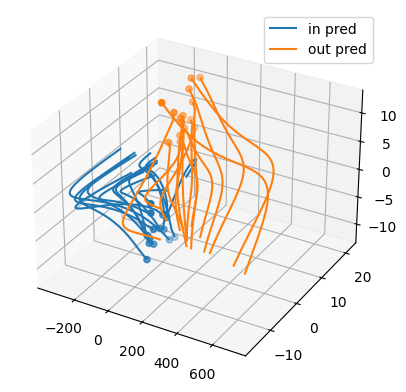

In [31]:
linear_model = dd.baselines.DNN(embed_dim, timesteps, activation=None, max_control_cost=0)
linear_model.fit(x, epochs=10, verbose='auto')
x_pred = linear_model.predict(x[:, 0], 50)
y_pred = linear_model.predict(y[:, 0], 50)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")

Epoch 1/10
157/157 [==============================] - 3s 6ms/step - loss: 1911.6588
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 1609.1217
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 1394.5583
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 1217.0260
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 1066.5995
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 937.7692
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 825.9971
Epoch 8/10
157/157 [==============================] - 1s 6ms/step - loss: 729.0034
Epoch 9/10
157/157 [==============================] - 1s 8ms/step - loss: 644.2122
Epoch 10/10
157/157 [==============================] - 1s 6ms/step - loss: 569.9016
x_err=203.1404201824185
y_err=346.67112531011145


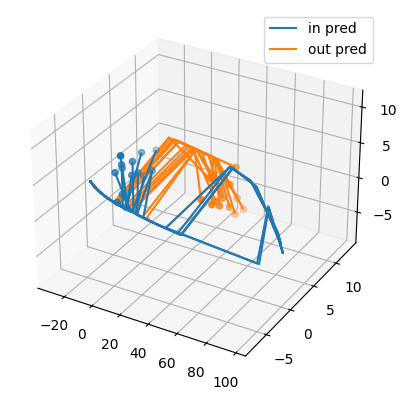

In [32]:
nonlinear_model = dd.baselines.DNN(embed_dim, timesteps, activation="tanh", max_control_cost=0)
nonlinear_model.fit(x, epochs=10, verbose='auto')
x_pred = nonlinear_model.predict(x[:, 0], 50)
y_pred = nonlinear_model.predict(y[:, 0], 50)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")